# Выбор локации для скважины

## Загрузка и подготовка данных

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    train_test_split
)
from sklearn.preprocessing import (
    StandardScaler
)  
from sklearn.metrics import mean_squared_error

In [2]:
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

RANDOM_STATE = 123456

In [3]:
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    display('Данные не найдены')

In [4]:
# Функция для более полного вывода информации одной строкой
def get_data_info(data):
    display(data.sample(5))
    display(data.info())
    display(data.describe(include='all'))
    display('-----------')
    display('Пропуски:')
    display('-----------')
    display(data.isna().sum())

### Обхор данных

In [5]:
display('----------------------------------------------------------------------')
display('Регион 0:', '----------------------------------------------------------------------')
get_data_info(geo_data_0)
display('----------------------------------------------------------------------')
display('Регион 1:', '----------------------------------------------------------------------')
get_data_info(geo_data_1)
display('----------------------------------------------------------------------')
display('Регион 2:', '----------------------------------------------------------------------')
get_data_info(geo_data_2)

'----------------------------------------------------------------------'

'Регион 0:'

'----------------------------------------------------------------------'

,id,f0,f1,f2,product
24568,ChQc4,1.381276,-0.331311,-3.757827,83.179569
87902,kzYxx,0.765205,-0.299760,0.986380,105.590386
2428,YdQaa,-0.788354,0.596382,7.814616,108.719254
68525,69Xnn,0.751717,0.855658,1.347325,105.080697
6259,SAgM9,1.142591,-0.023623,-1.132194,2.568577


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99990,NaN,NaN,NaN,NaN
top,74z30,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.500419,0.250143,2.502647,92.500000
std,NaN,0.871832,0.504433,3.248248,44.288691
min,NaN,-1.408605,-0.848218,-12.088328,0.000000
25%,NaN,-0.072580,-0.200881,0.287748,56.497507
50%,NaN,0.502360,0.250252,2.515969,91.849972
75%,NaN,1.073581,0.700646,4.715088,128.564089


'-----------'

'Пропуски:'

'-----------'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'----------------------------------------------------------------------'

'Регион 1:'

'----------------------------------------------------------------------'

,id,f0,f1,f2,product
70006,LSk2g,7.913429,-0.014977,0.000007,0.000000
66724,I544s,0.359719,-3.381802,-0.001173,0.000000
17686,6MIBt,8.904811,-5.656539,3.007900,80.859783
8078,CUWOH,-6.268780,-10.600521,0.003575,3.179103
81570,4iIZ8,-3.764586,-7.430904,0.999835,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,5ltQ6,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,1.141296,-4.796579,2.494541,68.825000
std,NaN,8.965932,5.119872,1.703572,45.944423
min,NaN,-31.609576,-26.358598,-0.018144,0.000000
25%,NaN,-6.298551,-8.267985,1.000021,26.953261
50%,NaN,1.153055,-4.813172,2.011479,57.085625
75%,NaN,8.621015,-1.332816,3.999904,107.813044


'-----------'

'Пропуски:'

'-----------'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'----------------------------------------------------------------------'

'Регион 2:'

'----------------------------------------------------------------------'

,id,f0,f1,f2,product
85665,kUHXq,0.160400,0.898625,3.670036,126.895017
80758,w9U9k,0.270102,-0.622914,1.008286,48.724030
67029,N0Meq,-0.106355,-2.367477,2.672146,94.450266
30892,UnLCW,1.235423,-0.036162,-1.227888,55.108093
65777,jDRKZ,-1.070858,-0.975465,5.141407,117.484018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,xCHr8,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.002023,-0.002081,2.495128,95.000000
std,NaN,1.732045,1.730417,3.473445,44.749921
min,NaN,-8.760004,-7.084020,-11.970335,0.000000
25%,NaN,-1.162288,-1.174820,0.130359,59.450441
50%,NaN,0.009424,-0.009482,2.484236,94.925613
75%,NaN,1.158535,1.163678,4.858794,130.595027


'-----------'

'Пропуски:'

'-----------'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
def get_corr_heatmap(df): 
    num_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    df_num = df[num_features]
    
    corr = df.corr()

    plt.figure(figsize=(12, 8))  

    sns.heatmap(corr, annot=True)  

    plt.show()  


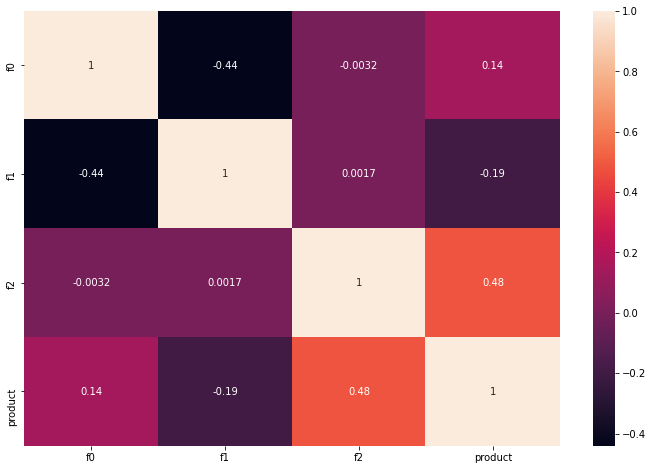

In [7]:
get_corr_heatmap(geo_data_0)

### Масштабирование данных

#### Регион 0

In [8]:
# Разделение на выборки
features_0 = geo_data_0.drop(['product', 'id'], axis=1)
target_0 = geo_data_0['product']

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=RANDOM_STATE
)

In [9]:
display(features_train_0.shape, features_valid_0.shape)

(75000, 3)

(25000, 3)

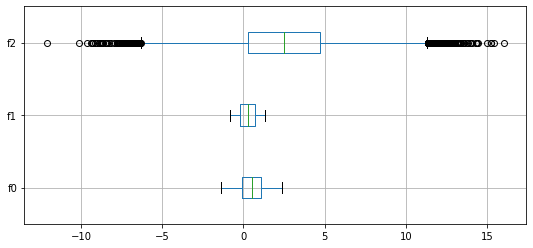

In [10]:
features_train_0.boxplot(vert = False, figsize=(9, 4));

Большое количество выбросов в признаке f2, значит, буду использовать стандартизацию, она менее чувствительна к выбросам

In [11]:
# Масшатабирование
scaler_0 = StandardScaler()
numeric = features_train_0.columns

scaler_0.fit(features_train_0[numeric])

features_train_0[numeric] = scaler_0.transform(features_train_0[numeric])
features_valid_0[numeric] = scaler_0.transform(features_valid_0[numeric])

In [12]:
features_train_0

,f0,f1,f2
1240,0.135047,-1.418404,-0.341502
90593,0.103940,-1.338424,-0.546315
73055,-0.555157,0.262769,-0.162768
27446,-0.790703,1.259564,-0.289128
52526,-1.046686,1.372940,-0.971353
...,...,...,...
41131,1.801898,0.335665,-0.740011
36408,-1.297860,1.088154,-0.290748
53746,1.192117,-1.254196,1.512526
88810,0.082569,-1.168989,-0.606083


#### Регион 1

In [13]:
# Разделение на выборки
features_1 = geo_data_1.drop(['product', 'id'], axis=1)
target_1 = geo_data_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=RANDOM_STATE
)

In [14]:
display(features_train_1.shape, features_valid_1.shape)

(75000, 3)

(25000, 3)

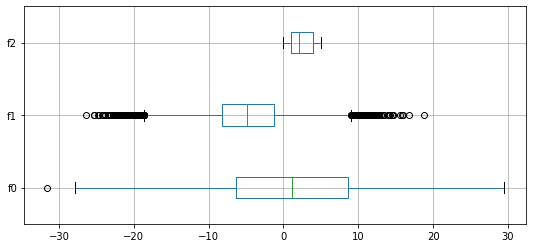

In [15]:
features_train_1.boxplot(vert = False, figsize=(9, 4));

Большое количество выбросов в признаке f1, значит, буду использовать стандартизацию, она менее чувствительна к выбросам

In [16]:
# Масшатабирование
scaler_1 = StandardScaler()
numeric = features_train_1.columns

scaler_1.fit(features_train_1[numeric])

features_train_1[numeric] = scaler_1.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler_1.transform(features_valid_1[numeric])

In [17]:
features_train_1

,f0,f1,f2
1240,-0.087410,-0.745152,-0.288810
90593,1.263760,0.368282,0.298450
73055,0.716004,-0.063309,-1.459664
27446,-0.392727,1.536331,-1.464589
52526,0.100926,0.671689,0.299045
...,...,...,...
41131,0.367942,0.033941,0.880117
36408,-1.042698,1.129959,1.472102
53746,-1.510472,-1.599770,-0.874516
88810,0.598370,-1.371088,-1.457231


#### Регион 3

In [18]:
features_2 = geo_data_2.drop(['product', 'id'], axis=1)
target_2 = geo_data_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=RANDOM_STATE
)

In [19]:
display(features_train_2.shape, features_valid_2.shape)

(75000, 3)

(25000, 3)

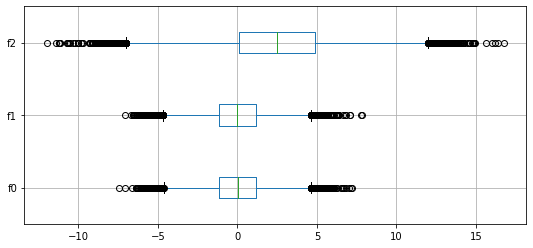

In [20]:
features_train_2.boxplot(vert = False, figsize=(9, 4));

Большое количество выбросов во всех признаках, значит, буду использовать стандартизацию, она менее чувствительна к выбросам

In [21]:
scaler_2 = StandardScaler()
numeric = features_train_2.columns

scaler_2.fit(features_train_2[numeric])

features_train_2[numeric] = scaler_2.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler_2.transform(features_valid_2[numeric])

In [22]:
features_train_2

,f0,f1,f2
1240,0.561942,-0.181474,0.372260
90593,-1.960359,-0.034928,1.062359
73055,0.672937,0.226855,1.220681
27446,2.293895,0.378451,0.120445
52526,-0.796759,-1.265388,-0.603417
...,...,...,...
41131,-0.994027,-0.961978,0.034215
36408,2.551254,-0.918194,-0.030666
53746,-0.238397,-1.508229,-0.810302
88810,0.493985,0.469580,-0.881658


### Вывод

Загрузил и подготовил данные, провел обзор данных, отмасшатаюировал данные методом стандартизации, так как в признаках наблюдались выбросы.

## Обучение и проверка модели

### Регион 0

In [61]:
model_0 = LinearRegression().fit(features_train_0, target_train_0)
model_0.distancemetric='mahalanobis'
predictions_valid_0 = model_0.predict(features_valid_0)

In [62]:
print('RMSE модели для региона 0: ', np.sqrt(mean_squared_error(target_valid_0, predictions_valid_0)))
print('Средний запас предсказанного сырья', predictions_valid_0.mean())

RMSE модели для региона 0:  37.80046993478272
Средний запас предсказанного сырья 92.49286560032228


Модель ошибается в среднем на 37 тыс баррелей, при средних разведанных (не предсказаанных) запасах 93 тыс баррелей на скважину

### Регион 1

In [63]:
model_1 = LinearRegression().fit(features_train_1, target_train_1)
model_1.distancemetric='mahalanobis'
predictions_valid_1 = model_1.predict(features_valid_1)

In [64]:
print('RMSE модели для региона 1: ', np.sqrt(mean_squared_error(target_valid_1, predictions_valid_1)))
print('Средний запас предсказанного сырья', predictions_valid_1.mean())

RMSE модели для региона 1:  0.8904933206270059
Средний запас предсказанного сырья 69.03055429593262


Фантастический результат модель практически не ошибается, вероятно это связано с высокой корреляцией целевого признака с каким-то или какими-то нецелевыми признаками

### Регион 2

In [27]:
model_2 = LinearRegression().fit(features_train_2, target_train_2)
predictions_valid_2 = model_2.predict(features_valid_2)

In [28]:
print('RMSE модели для региона 2: ', np.sqrt(mean_squared_error(target_valid_2, predictions_valid_2)))
print('Средний запас предсказанного сырья', predictions_valid_2.mean())

RMSE модели для региона 2:  39.98039278339241
Средний запас предсказанного сырья 94.84835708988288


Модель ошибается в среднем на 39 тыс баррелей, при средних разведанных (не предсказанных) запасах 94-95 тыс баррелей на скважину

## Подготовка к расчёту прибыли

### Определил константы и необходимые для дальнейшего расчета данные

Как я понял, бюджет 10 млрд руб, означает что мне необходимо найти, куда вложив все эти 10 млрд руб (то есть, считать их фактическими затратами на разработку скважин в регионе) можно получить максимальную прибыль с наибольшей вероятностью

In [29]:
BUDGET = 10_000_000 #Бюджет на разработку скважин в регионе, тыс.руб
INCOME_ONE_PROD = 450 #Доход с каждой единицы продукта, тыс.руб
MAX_RISK = 2.5/100 # вероятность убытков
TOTAL_WELLS = 500 # Скважин для исследования
BEST_WELLS = 200 # Лучшие скважины

In [30]:
min_profit = ((BUDGET / BEST_WELLS) / INCOME_ONE_PROD)
min_profit

111.11111111111111

In [31]:
budg_1_point=(BUDGET/BEST_WELLS)
print('Бюджет на разработку одной скважины:', budg_1_point/1000,'млн.руб')

Бюджет на разработку одной скважины: 50.0 млн.руб


Для безубыточной разработки одной скважины необходим объем сырья выше 111 тыс барелей в ней, затраты на разработку одной скважины - 50 млн. руб. Если изменить количество скважин для разработки, то окажется что изменилась цена разработки одной скважины (скорее всего, цена разработки одной скважины известна заранеее в реальности)

In [32]:
print('Средний объем скважины (тыс. баррелей) в регионе 0: ', geo_data_0['product'].mean())
print('Средний объем скважины (тыс. баррелей) в регионе 1: ', geo_data_1['product'].mean())
print('Средний объем скважины (тыс. баррелей) в регионе 2: ', geo_data_2['product'].mean())

Средний объем скважины (тыс. баррелей) в регионе 0:  92.50000000000001
Средний объем скважины (тыс. баррелей) в регионе 1:  68.82500000000002
Средний объем скважины (тыс. баррелей) в регионе 2:  95.00000000000004


Во всех трех регионах недостаточно среднего объема на скважину для безубыточной разработки (никто не говорил, что нефтедобыча это легко), однако, все упирается в детали

In [33]:
print(geo_data_0['product'].quantile(q=0.64))
print(geo_data_1['product'].quantile(q=0.76))
print(geo_data_2['product'].quantile(q=0.62))

111.87171774253068
110.992146709366
111.33727624548305


Если я конечно, правильно все рассчитал и понял, то прибыльных скважин в регионе 0 - 36%, в регионе 1 - 24%, в регионе 2 - 38%, но наше дело рассчитать вероятность прибыли и где она будет максимальна

Определим, доход с каждой скважины в регионах

In [34]:
geo_data_0['profit']=(geo_data_0['product']*(INCOME_ONE_PROD/1000)).round(2)
geo_data_1['profit']=(geo_data_1['product']*(INCOME_ONE_PROD/1000)).round(2)
geo_data_2['profit']=(geo_data_2['product']*(INCOME_ONE_PROD/1000)).round(2)

Определим значение ROI для регионов

In [35]:
geo_data_0['roi_%']=((geo_data_0['profit']-budg_1_point)/budg_1_point*100).round(2)
geo_data_1['roi_%']=((geo_data_1['profit']-budg_1_point)/budg_1_point*100).round(2)
geo_data_2['roi_%']=((geo_data_2['profit']-budg_1_point)/budg_1_point*100).round(2)

### Вывод

Обучил и проверил модели на корень из среднеквадратичной ошибки, невероятные результаты показал второй регион, вероятно из-за того что данные абсолютно синтетические, а во втором регионе специально сделали среднеквадратичную ошибку мизерной

## Расчёт прибыли и рисков 

Через серию привязал значеня к индексам таргета и сохранил 200 лучших скважин

In [36]:
probs_sorted_0 = pd.Series(predictions_valid_0, index=target_valid_0.index).sort_values(ascending=False)
selected_max_0 = probs_sorted_0[:200]
probs_sorted_1 = pd.Series(predictions_valid_1, index=target_valid_1.index).sort_values(ascending=False)
selected_max_1 = probs_sorted_1[:200]
probs_sorted_2 = pd.Series(predictions_valid_2, index=target_valid_2.index).sort_values(ascending=False)
selected_max_2 = probs_sorted_2[:200]

In [37]:
selected_max_0_sum = selected_max_0.sum()
selected_max_1_sum = selected_max_1.sum()
selected_max_2_sum = selected_max_2.sum()
print(f'Суммарный запас сырья в 200 лучших скважинах региона 0 составит: {round(selected_max_0_sum, 2)} тыс.баррелей' )
print(f'Суммарный запас сырья в 200 лучших скважинах региона 1 составит: {round(selected_max_1_sum, 2)} тыс.баррелей' )
print(f'Суммарный запас сырья в 200 лучших скважинах региона 2 составит: {round(selected_max_2_sum, 2)} тыс.баррелей' )

Суммарный запас сырья в 200 лучших скважинах региона 0 составит: 30842.55 тыс.баррелей
Суммарный запас сырья в 200 лучших скважинах региона 1 составит: 27752.85 тыс.баррелей
Суммарный запас сырья в 200 лучших скважинах региона 2 составит: 29642.59 тыс.баррелей


In [38]:
profit_pred_0=(selected_max_0_sum*INCOME_ONE_PROD)-BUDGET
profit_pred_1=(selected_max_1_sum*INCOME_ONE_PROD)-BUDGET
profit_pred_2=(selected_max_2_sum*INCOME_ONE_PROD)-BUDGET
print(f'Прибыль для полученного объёма сырья в регионе 0 составит {round(profit_pred_0, 2)} тыс.рублей')
print(f'Прибыль для полученного объёма сырья в регионе 1 составит {round(profit_pred_1, 2)} тыс.рублей')
print(f'Прибыль для полученного объёма сырья в регионе 2 составит {round(profit_pred_2, 2)} тыс.рублей')

Прибыль для полученного объёма сырья в регионе 0 составит 3879147.81 тыс.рублей
Прибыль для полученного объёма сырья в регионе 1 составит 2488781.46 тыс.рублей
Прибыль для полученного объёма сырья в регионе 2 составит 3339163.68 тыс.рублей


На основне данных вычислений можно написать функцию расчета прибыли

In [39]:
def profit(predict,target,count):
    probs_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected_max = probs_sorted[:count].sum()
    profit_pred=(selected_max*INCOME_ONE_PROD)-BUDGET
    print(f'Суммарный запас сырья в {count} лучших скважинах составит: {round(selected_max, 2)} тыс.баррелей')
    print(f'Прибыль для полученного объёма сырья составит {round(profit_pred/1000)} млн.рублей')

In [40]:
profit(predictions_valid_0,target_valid_0,200)

Суммарный запас сырья в 200 лучших скважинах составит: 30842.55 тыс.баррелей
Прибыль для полученного объёма сырья составит 3879 млн.рублей


In [41]:
profit(predictions_valid_1,target_valid_1,200)

Суммарный запас сырья в 200 лучших скважинах составит: 27752.85 тыс.баррелей
Прибыль для полученного объёма сырья составит 2489 млн.рублей


In [42]:
profit(predictions_valid_2,target_valid_2,200)

Суммарный запас сырья в 200 лучших скважинах составит: 29642.59 тыс.баррелей
Прибыль для полученного объёма сырья составит 3339 млн.рублей


Применил технику boostrap 1000 выборок, чтобы найти распределение прибыли, необходимо найти среднюю прибыль и 95% доверительный интервал

In [43]:
# Изменил функцию для использования ее в бустрепе
def profit(predict,target,count):
    probs_sorted = pd.Series(predict).sort_values(ascending=False)
    selected_points = target[probs_sorted.index][:count]
    product = selected_points.sum()
    revenue = product * INCOME_ONE_PROD
    return revenue - BUDGET

In [44]:
def bootstap(target,predict):
    values = []
    count=0
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict, index=target.index)
    
    for i in tqdm(range(1000)):
        target_subsample = target.sample(n=500,replace=True, random_state=state)
  
        probs_subsample = predict_e[target_subsample.index]
        values.append(profit(probs_subsample,target_subsample, 200))  
    for i in values:
        if i < 0:
            count +=1
            
    values = pd.Series(values)
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    
    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(8,5))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((low_95/1000),(high_95/1000)))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб". format((confidence_interval[0]/1000),(confidence_interval[1]/1000)))
    print ('Процент вероятности убытка в данном регионе составит {:.1%}'.format(count/1000))

In [45]:
#ячейка ревьюера

print('Начальные данные')
target = pd.DataFrame({'target': [1]})
preds = pd.DataFrame({'pred': [2]})
print(preds, '\n', target, '\n')
print('Результат семплирования')
preds_bs = preds.sample(n=2, replace=True)
target_bs = target.loc[preds_bs.index]
print(preds_bs, '\n', target_bs, '\n')
print('Результат сопоставления по индексам')
preds_sorted = preds_bs.sort_values('pred', ascending=False)
target_selected = target_bs.loc[preds_sorted[:2].index]
print(preds_sorted, '\n', target_selected)

Начальные данные
   pred
0     2 
    target
0       1 

Результат семплирования
   pred
0     2
0     2 
    target
0       1
0       1 

Результат сопоставления по индексам
   pred
0     2
0     2 
    target
0       1
0       1
0       1
0       1


In [46]:
#ячейка ревьюера

print('Начальные данные')
target = pd.DataFrame({'target': [1]})
target['pred'] = 2
print(target, '\n')
print('Результат семплирования')
sample_df = target.sample(n=2, replace=True)
print(sample_df, '\n')
print('Таргет соответствующий лучшим предсказаниям')
df_sorted = sample_df.sort_values('pred', ascending=False)
target_selected = df_sorted['target']
print('target', '\n', target_selected)

Начальные данные
   target  pred
0       1     2 

Результат семплирования
   target  pred
0       1     2
0       1     2 

Таргет соответствующий лучшим предсказаниям
target 
 0    1
0    1
Name: target, dtype: int64


  0%|          | 0/1000 [00:00<?, ?it/s]

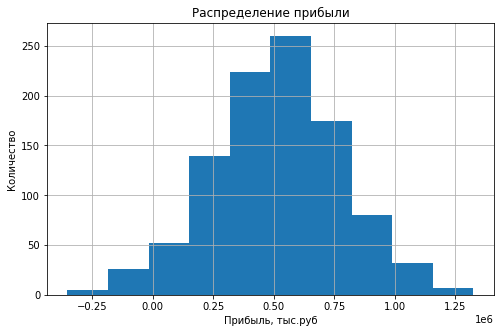

Средняя прибыль: 514.14 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -44.13 млн.руб до: 1018.57 млн.руб
95%-ый доверительный интервал: от 497.67 млн.руб до 530.61 млн.руб
Процент вероятности убытка в данном регионе составит 3.4%


In [47]:
bootstap(target_valid_0, predictions_valid_0)

  0%|          | 0/1000 [00:00<?, ?it/s]

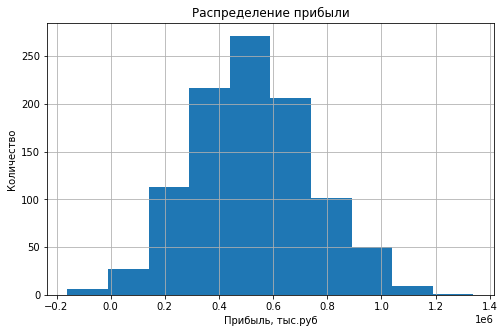

Средняя прибыль: 523.54 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 98.79 млн.руб до: 963.56 млн.руб
95%-ый доверительный интервал: от 509.85 млн.руб до 537.22 млн.руб
Процент вероятности убытка в данном регионе составит 0.7%


In [48]:
bootstap(target_valid_1, predictions_valid_1)

  0%|          | 0/1000 [00:00<?, ?it/s]

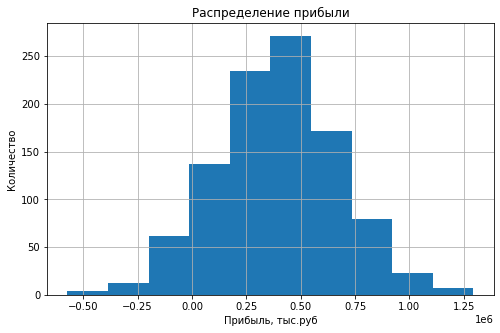

Средняя прибыль: 394.89 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -141.39 млн.руб до: 943.98 млн.руб
95%-ый доверительный интервал: от 377.34 млн.руб до 412.45 млн.руб
Процент вероятности убытка в данном регионе составит 8.7%


In [49]:
bootstap(target_valid_2, predictions_valid_2)

### Вывод

Основываясь на распределении среднего значения прибыли, второй регион получил наивысшую доходность - 523.54 млн.рублей. Однако, два других региона не смогли удовлетворить требуемый 2,5%-ый порог убытка. Имея мало сырья, 2-ой регион является самым "доходным" - свыше других.

## Вывод

Я исследовал данные о запасах сырья по 10 тысячам скважин в трех различных регионах. Изначально я определил, что средний резерв в каждом регионе недостаточен для покрытия затрат на разработку. Чтобы оценить потенциальную прибыль от разработки в каждом регионе, я применил линейную регрессию, технологию boostrap и разделил датасеты по регионам на 1000 различных выборок каждый

Основываясь на проанализированных данных, я установил 95% доверительный интервал прибыли, снизив риск потери до менее чем 2,5%. Используя эту информацию, я смог точно определить наиболее прибыльную область для разработки 200 скважин.

Следовательно, несмотря на сравнительно более низкие оценки запасов сырья в 27,75 млн баррелей во втором регионе (регион 1 в датасете по сравнению с другими регионами), что может означать потенциальную потерю 0,7%, но с ожидаемой прибылью, превышающей 523,54 млн рублей, я рекомендую к разработке 200 скважин 2-ой регион.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован